In [1]:
import pickle
pickle.HIGHEST_PROTOCOL = 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('hugonnet_2021_ds_rgi60_pergla_rates_10_20_worldwide.csv', index_col=0)

In [4]:
df

period      area    dhdt  err_dhdt    dvoldt  \
rgiid                                                                         
RGI60-01.00001  2000-01-01_2020-01-01  360000.0 -0.0150    0.2559   -5414.0   
RGI60-01.00001  2010-01-01_2020-01-01  360000.0 -0.0556    0.4645  -20003.0   
RGI60-01.00001  2000-01-01_2010-01-01  360000.0  0.0255    0.5059    9175.0   
RGI60-01.00002  2000-01-01_2020-01-01  558000.0 -0.2695    0.1653 -150361.0   
RGI60-01.00002  2010-01-01_2020-01-01  558000.0 -0.3410    0.3234 -190257.0   
...                               ...       ...     ...       ...       ...   
RGI60-19.02751  2000-01-01_2020-01-01   11000.0 -2.1611    0.8691  -23772.0   
RGI60-19.02751  2000-01-01_2010-01-01   11000.0 -2.1317    1.7586  -23449.0   
RGI60-19.02752  2000-01-01_2010-01-01  528000.0  0.1427    0.6371   75344.0   
RGI60-19.02752  2000-01-01_2020-01-01  528000.0 -0.0454    0.3407  -23981.0   
RGI60-19.02752  2010-01-01_2020-01-01  528000.0 -0.2335    0.5643 -123306.0   

                err_dvoldt      dmdt  err_dmdt  dmdtda  err_dmdtda  \
rgiid                                                                
RGI60-01.00001     92139.0 -0.000005  0.000078 -0.0128      0.2176   
RGI60-01.00001    167248.0 -0.000017  0.000142 -0.0472      0.3949   
RGI60-01.00001    182132.0  0.000008  0.000155  0.0217      0.4300   
RGI60-01.00002     93741.0 -0.000128  0.000080 -0.2290      0.1460   
RGI60-01.00002    181714.0 -0.000162  0.000155 -0.2898      0.2794   
...                    ...       ...       ...     ...         ...   
RGI60-19.02751     21979.0 -0.000020  0.000019 -1.8369      2.2891   
RGI60-19.02751     27483.0 -0.000020  0.000023 -1.8119      2.6080   
RGI60-19.02752    336536.0  0.000064  0.000286  0.1213      0.5421   
RGI60-19.02752    179916.0 -0.000020  0.000153 -0.0386      0.2897   
RGI60-19.02752    298432.0 -0.000105  0.000254 -0.1985      0.4814   

                perc_area_meas  perc_area_res  valid_obs  valid_obs_py  reg  
rgiid                                                                        
RGI60-01.00001           1.000          1.000      26.41         11.11    1  
RGI60-01.00001           1.000          1.000      18.30          6.32    1  
RGI60-01.00001           1.000          1.000       8.11          4.78    1  
RGI60-01.00002           1.000          1.000      26.21         16.23    1  
RGI60-01.00002           1.000          1.000      15.18          7.95    1  
...                        ...            ...        ...           ...  ...  
RGI60-19.02751           1.000          1.000       4.00          4.00   19  
RGI60-19.02751           1.000          1.000       0.00          0.00   19  
RGI60-19.02752           0.981          0.981       2.74          1.70   19  
RGI60-19.02752           0.981          0.981       6.91          5.15   19  
RGI60-19.02752           0.981          0.981       4.17          3.44   19  

[654390 rows x 15 columns]

In [5]:
df.to_hdf('hugonnet_2021_ds_rgi60_pergla_rates_10_20_worldwide.hdf', key='df')

## Convert Caucasus glaciers to RGI

In [6]:
df = pd.read_hdf('hugonnet_2021_ds_rgi60_pergla_rates_10_20_worldwide.hdf')

In [7]:
dfs = df.loc[df['period'] == '2000-01-01_2020-01-01']

In [8]:
len(dfs)

218130

In [9]:
not_rgi = np.array(['RGI60' not in s for s in dfs.index])
len(dfs.loc[not_rgi]), len(dfs.loc[~not_rgi])

(3516, 214614)

In [10]:
lookup = pd.read_csv('12_GLIMSId_RGIId_dict.csv', header=None, index_col=0)[1].to_dict()

In [11]:
new_index = df.index.values.copy()
for i, rid in enumerate(new_index):
    if rid in lookup:
        new_index[i] = lookup[rid]

In [12]:
df_new = df.set_index(new_index)

In [13]:
not_rgi = np.array(['RGI60' not in s for s in df_new.index])
df_new.loc[not_rgi]

period    area  dhdt  err_dhdt  dvoldt  \
G039564E39446N  2010-01-01_2020-01-01  8000.0   NaN       NaN     NaN   
G039564E39446N  2000-01-01_2020-01-01  8000.0   NaN       NaN     NaN   
G039564E39446N  2000-01-01_2010-01-01  8000.0   NaN       NaN     NaN   
G039579E39451N  2000-01-01_2020-01-01  8000.0   NaN       NaN     NaN   
G039579E39451N  2000-01-01_2010-01-01  8000.0   NaN       NaN     NaN   
...                               ...     ...   ...       ...     ...   
G052226E35769N  2010-01-01_2020-01-01     0.0   NaN       NaN     NaN   
G052226E35769N  2000-01-01_2020-01-01     0.0   NaN       NaN     NaN   
G052227E35770N  2000-01-01_2010-01-01     0.0   NaN       NaN     NaN   
G052227E35770N  2010-01-01_2020-01-01     0.0   NaN       NaN     NaN   
G052227E35770N  2000-01-01_2020-01-01     0.0   NaN       NaN     NaN   

                err_dvoldt  dmdt  err_dmdt  dmdtda  err_dmdtda  \
G039564E39446N         NaN   NaN       NaN     NaN         NaN   
G039564E39446N         NaN   NaN       NaN     NaN         NaN   
G039564E39446N         NaN   NaN       NaN     NaN         NaN   
G039579E39451N         NaN   NaN       NaN     NaN         NaN   
G039579E39451N         NaN   NaN       NaN     NaN         NaN   
...                    ...   ...       ...     ...         ...   
G052226E35769N         NaN   NaN       NaN     NaN         NaN   
G052226E35769N         NaN   NaN       NaN     NaN         NaN   
G052227E35770N         NaN   NaN       NaN     NaN         NaN   
G052227E35770N         NaN   NaN       NaN     NaN         NaN   
G052227E35770N         NaN   NaN       NaN     NaN         NaN   

                perc_area_meas  perc_area_res  valid_obs  valid_obs_py  reg  
G039564E39446N             NaN            NaN        0.0           0.0   12  
G039564E39446N             NaN            NaN        0.0           0.0   12  
G039564E39446N             NaN            NaN        0.0           0.0   12  
G039579E39451N             NaN            NaN        0.0           0.0   12  
G039579E39451N             NaN            NaN        0.0           0.0   12  
...                        ...            ...        ...           ...  ...  
G052226E35769N             NaN            NaN        0.0           0.0   12  
G052226E35769N             NaN            NaN        0.0           0.0   12  
G052227E35770N             NaN            NaN        0.0           0.0   12  
G052227E35770N             NaN            NaN        0.0           0.0   12  
G052227E35770N             NaN            NaN        0.0           0.0   12  

[6330 rows x 15 columns]

In [14]:
df_new.loc[not_rgi].reg.unique()

array([12])

In [15]:
df_new = df_new.loc[~ not_rgi]

In [16]:
template = df_new.copy(deep=True).iloc[0:3]

In [17]:
template[template.columns[1:]] = np.NaN
template['reg'] = 12

In [18]:
template

period  area  dhdt  err_dhdt  dvoldt  \
RGI60-01.00001  2000-01-01_2020-01-01   NaN   NaN       NaN     NaN   
RGI60-01.00001  2010-01-01_2020-01-01   NaN   NaN       NaN     NaN   
RGI60-01.00001  2000-01-01_2010-01-01   NaN   NaN       NaN     NaN   

                err_dvoldt  dmdt  err_dmdt  dmdtda  err_dmdtda  \
RGI60-01.00001         NaN   NaN       NaN     NaN         NaN   
RGI60-01.00001         NaN   NaN       NaN     NaN         NaN   
RGI60-01.00001         NaN   NaN       NaN     NaN         NaN   

                perc_area_meas  perc_area_res  valid_obs  valid_obs_py  reg  
RGI60-01.00001             NaN            NaN        NaN           NaN   12  
RGI60-01.00001             NaN            NaN        NaN           NaN   12  
RGI60-01.00001             NaN            NaN        NaN           NaN   12

In [19]:
rgi = pd.read_hdf('../rgi/rgi62_stats.h5')

In [20]:
len(rgi), len(rgi.loc[rgi['O1Region']!='12'])

(216502, 214614)

OK so all glaciers are already in the data expect the ones without lookup in region 12. 

In [21]:
to_add = []
for rid, s in rgi.loc[rgi['O1Region']=='12'].iterrows():
    if rid not in df_new.index:
        new_id = template.copy(deep=True)
        new_id.index = [rid]*3
        new_id['area'] = s['Area'] * 1e6
        to_add.append(new_id)
to_add = pd.concat(to_add)

In [22]:
df_new = pd.concat([df_new, to_add]).sort_index()

In [23]:
assert len(df_new) / 3 == len(rgi)

In [24]:
df_new = df_new.rename_axis('rgiid').sort_values(by = ['rgiid', 'period'])
df_new

period      area    dhdt  err_dhdt    dvoldt  \
rgiid                                                                         
RGI60-01.00001  2000-01-01_2010-01-01  360000.0  0.0255    0.5059    9175.0   
RGI60-01.00001  2000-01-01_2020-01-01  360000.0 -0.0150    0.2559   -5414.0   
RGI60-01.00001  2010-01-01_2020-01-01  360000.0 -0.0556    0.4645  -20003.0   
RGI60-01.00002  2000-01-01_2010-01-01  558000.0 -0.1980    0.3267 -110465.0   
RGI60-01.00002  2000-01-01_2020-01-01  558000.0 -0.2695    0.1653 -150361.0   
...                               ...       ...     ...       ...       ...   
RGI60-19.02751  2000-01-01_2020-01-01   11000.0 -2.1611    0.8691  -23772.0   
RGI60-19.02751  2010-01-01_2020-01-01   11000.0 -2.1904    1.5831  -24095.0   
RGI60-19.02752  2000-01-01_2010-01-01  528000.0  0.1427    0.6371   75344.0   
RGI60-19.02752  2000-01-01_2020-01-01  528000.0 -0.0454    0.3407  -23981.0   
RGI60-19.02752  2010-01-01_2020-01-01  528000.0 -0.2335    0.5643 -123306.0   

                err_dvoldt      dmdt  err_dmdt  dmdtda  err_dmdtda  \
rgiid                                                                
RGI60-01.00001    182132.0  0.000008  0.000155  0.0217      0.4300   
RGI60-01.00001     92139.0 -0.000005  0.000078 -0.0128      0.2176   
RGI60-01.00001    167248.0 -0.000017  0.000142 -0.0472      0.3949   
RGI60-01.00002    182728.0 -0.000094  0.000155 -0.1683      0.2792   
RGI60-01.00002     93741.0 -0.000128  0.000080 -0.2290      0.1460   
...                    ...       ...       ...     ...         ...   
RGI60-19.02751     21979.0 -0.000020  0.000019 -1.8369      2.2891   
RGI60-19.02751     26564.0 -0.000020  0.000023 -1.8619      2.5755   
RGI60-19.02752    336536.0  0.000064  0.000286  0.1213      0.5421   
RGI60-19.02752    179916.0 -0.000020  0.000153 -0.0386      0.2897   
RGI60-19.02752    298432.0 -0.000105  0.000254 -0.1985      0.4814   

                perc_area_meas  perc_area_res  valid_obs  valid_obs_py  reg  
rgiid                                                                        
RGI60-01.00001           1.000          1.000       8.11          4.78    1  
RGI60-01.00001           1.000          1.000      26.41         11.11    1  
RGI60-01.00001           1.000          1.000      18.30          6.32    1  
RGI60-01.00002           1.000          1.000      11.04          8.28    1  
RGI60-01.00002           1.000          1.000      26.21         16.23    1  
...                        ...            ...        ...           ...  ...  
RGI60-19.02751           1.000          1.000       4.00          4.00   19  
RGI60-19.02751           1.000          1.000       4.00          4.00   19  
RGI60-19.02752           0.981          0.981       2.74          1.70   19  
RGI60-19.02752           0.981          0.981       6.91          5.15   19  
RGI60-19.02752           0.981          0.981       4.17          3.44   19  

[649506 rows x 15 columns]

In [25]:
df_new.to_hdf('hugonnet_2021_ds_rgi60_pergla_rates_10_20_worldwide_reg12cor.hdf', key='df')

#### Remove connectivity level 2

In [26]:
valid_ids = rgi.loc[rgi['Connect'] != 2].index
c2_ids = rgi.loc[rgi['Connect'] == 2].index
df_new = df_new.loc[valid_ids].copy(deep=True)
rgi = rgi.loc[valid_ids].copy(deep=True)

In [27]:
df_new.loc[df_new['dmdtda'].isnull()]

period      area  dhdt  err_dhdt  dvoldt  \
rgiid                                                                     
RGI60-01.01185  2000-01-01_2010-01-01   63000.0   NaN       NaN     NaN   
RGI60-01.01185  2000-01-01_2020-01-01   63000.0   NaN       NaN     NaN   
RGI60-01.01185  2010-01-01_2020-01-01   63000.0   NaN       NaN     NaN   
RGI60-01.01296  2000-01-01_2010-01-01  492000.0   NaN       NaN     NaN   
RGI60-01.01296  2000-01-01_2020-01-01  492000.0   NaN       NaN     NaN   
...                               ...       ...   ...       ...     ...   
RGI60-19.02735  2000-01-01_2020-01-01   53000.0   NaN       NaN     NaN   
RGI60-19.02735  2010-01-01_2020-01-01   53000.0   NaN       NaN     NaN   
RGI60-19.02748  2000-01-01_2010-01-01   42000.0   NaN       NaN     NaN   
RGI60-19.02748  2000-01-01_2020-01-01   42000.0   NaN       NaN     NaN   
RGI60-19.02748  2010-01-01_2020-01-01   42000.0   NaN       NaN     NaN   

                err_dvoldt  dmdt  err_dmdt  dmdtda  err_dmdtda  \
rgiid                                                            
RGI60-01.01185         NaN   NaN       NaN     NaN         NaN   
RGI60-01.01185         NaN   NaN       NaN     NaN         NaN   
RGI60-01.01185         NaN   NaN       NaN     NaN         NaN   
RGI60-01.01296         NaN   NaN       NaN     NaN         NaN   
RGI60-01.01296         NaN   NaN       NaN     NaN         NaN   
...                    ...   ...       ...     ...         ...   
RGI60-19.02735         NaN   NaN       NaN     NaN         NaN   
RGI60-19.02735         NaN   NaN       NaN     NaN         NaN   
RGI60-19.02748         NaN   NaN       NaN     NaN         NaN   
RGI60-19.02748         NaN   NaN       NaN     NaN         NaN   
RGI60-19.02748         NaN   NaN       NaN     NaN         NaN   

                perc_area_meas  perc_area_res  valid_obs  valid_obs_py  reg  
rgiid                                                                        
RGI60-01.01185             NaN            NaN       0.00          0.00    1  
RGI60-01.01185             NaN            NaN       0.00          0.00    1  
RGI60-01.01185             NaN            NaN       0.00          0.00    1  
RGI60-01.01296             NaN            NaN      26.08          5.43    1  
RGI60-01.01296             NaN            NaN      67.94         11.24    1  
...                        ...            ...        ...           ...  ...  
RGI60-19.02735             NaN            NaN       2.20          2.20   19  
RGI60-19.02735             NaN            NaN       0.00          0.00   19  
RGI60-19.02748             NaN            NaN       2.67          2.67   19  
RGI60-19.02748             NaN            NaN       2.67          2.67   19  
RGI60-19.02748             NaN            NaN       0.00          0.00   19  

[21225 rows x 15 columns]

## Remove outliers and fill missing 

In [28]:
dfs = df_new.loc[df_new.period == '2000-01-01_2020-01-01'].copy(deep=True)[['area', 'dmdtda', 'err_dmdtda', 'reg']]

In [29]:
dfs.err_dmdtda.quantile([0.001, 0.01, 0.5, 0.99, 0.999])

0.001    0.075294
0.010    0.103500
0.500    0.222300
0.990    0.879962
0.999    2.051393
Name: err_dmdtda, dtype: float64

In [30]:
dfs.err_dmdtda.max()

13.7913

In [31]:
# SHOULD IT BE AREA WEIGHTED???? Maybe not
all_sigma_mean = dfs['err_dmdtda'].mean()
all_sigma_std = dfs['err_dmdtda'].std()
all_sigma_threshold = all_sigma_mean + 3 * all_sigma_std
print('all sigma threshold:', np.round(all_sigma_threshold, 2))

all sigma threshold: 0.83


In [32]:
periods = ['2000-01-01_2010-01-01', '2000-01-01_2020-01-01', '2010-01-01_2020-01-01']
# We filter and fill all periods based on the 20 year threshold
df_filled = df_new.copy()[['period', 'area', 'dmdtda', 'err_dmdtda', 'reg']]
df_filled['is_cor'] = False
for reg in range(1, 20):
    
    dfs_subset = dfs.loc[dfs['reg'] == reg]
    
    # Too high of sigma causes large issues for model
    reg_sigma_mean = dfs_subset['err_dmdtda'].mean()
    reg_sigma_std = dfs_subset['err_dmdtda'].std()
    reg_sigma_threshold = reg_sigma_mean + 3 * reg_sigma_std
    
    # Don’t penalize regions that are well-measured, so use all threshold as minimum
    if reg_sigma_threshold < all_sigma_threshold:
        reg_sigma_threshold = all_sigma_threshold
        
    to_replace = dfs_subset.loc[dfs_subset['err_dmdtda'] > reg_sigma_threshold]
    to_keep = dfs_subset.loc[dfs_subset['err_dmdtda'] <= reg_sigma_threshold]
    
    print(reg, len(dfs_subset), len(to_replace),  np.round(reg_sigma_threshold, 2))
        
    df_filled.loc[to_replace.index, 'dmdtda'] = np.NaN
    df_filled.loc[to_replace.index, 'err_dmdtda'] = np.NaN
    
    # Replace nan values - SHOULD BE AREA WEIGHTED????
    for period in periods:
        
        loc_no = (df_filled['reg'] == reg) & (df_filled['dmdtda'].isnull()) & (df_filled['period'] == period)
        loc_yes = (df_filled['reg'] == reg) & (~ df_filled['dmdtda'].isnull()) & (df_filled['period'] == period)
        
        df_filled.loc[loc_no,  'dmdtda'] = df_filled.loc[loc_yes,  'dmdtda'].mean()
        df_filled.loc[loc_no,  'err_dmdtda'] = df_filled.loc[loc_yes,  'err_dmdtda'].mean()
        df_filled.loc[loc_no,  'is_cor'] = True

1 27108 182 0.83
2 18855 190 0.83
3 4556 14 0.83
4 7415 8 0.83
5 19306 27 0.83
6 568 1 0.83
7 1615 1 0.83
8 3417 30 0.83
9 1069 0 0.83
10 5151 77 1.11
11 3927 57 1.19
12 1888 19 0.83
13 54429 200 0.83
14 27988 238 0.83
15 13119 128 0.83
16 2939 46 0.92
17 15908 228 1.53
18 3537 29 1.08
19 2752 47 1.45


In [33]:
dfs_filled = df_filled.loc[df_new.period == '2000-01-01_2020-01-01']

In [34]:
dfs_filled.err_dmdtda.quantile([0.001, 0.01, 0.5, 0.99, 0.999])

0.001    0.075754
0.010    0.104000
0.500    0.226100
0.990    0.739012
0.999    1.154537
Name: err_dmdtda, dtype: float64

In [35]:
dfs_filled.err_dmdtda.max()

1.5258

In [36]:
dfs_filled.dmdtda.max()

8.034

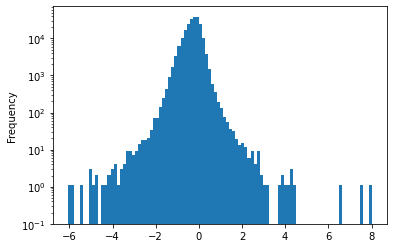

In [37]:
fig, ax = plt.subplots()
dfs_filled.dmdtda.plot(kind='hist', bins=100, bottom=0.1);
ax.set_yscale('log')

In [38]:
dfs_filled.loc[dfs_filled.dmdtda > 0].area.sum() / dfs_filled.area.sum()

0.131646168795644

In [39]:
for period in periods:
    dfs_filled = df_filled.loc[df_new.period == period]
    print(dfs_filled.err_dmdtda.max(), dfs_filled.dmdtda.max(), dfs_filled.loc[dfs_filled.dmdtda > 0].area.sum() / dfs_filled.area.sum())
    print()

2.9998 8.1011 0.17330095951061922

1.5258 8.034 0.131646168795644

3.6942 7.9669 0.16136250307112143



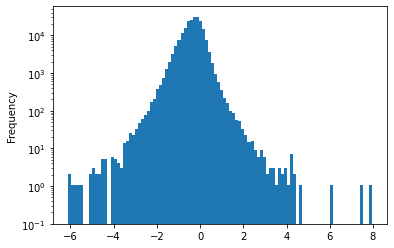

In [40]:
fig, ax = plt.subplots()
dfs_filled.dmdtda.plot(kind='hist', bins=100, bottom=0.1);
ax.set_yscale('log')

In [41]:
df_filled.loc[df_filled['dmdtda'].isnull()]

Empty DataFrame
Columns: [period, area, dmdtda, err_dmdtda, reg, is_cor]
Index: []

In [42]:
df_filled.to_hdf('hugonnet_2021_ds_rgi60_pergla_rates_10_20_worldwide_filled.hdf', key='df')